In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv('GlobalLandTemperaturesByCity.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

In [3]:
dataset.head()

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
dt,,,,,,
1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [4]:
usa = dataset[dataset['Country'] == 'United States']

In [5]:
usa.head()

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
dt,,,,,,
1820-01-01,2.101,3.217,Abilene,United States,32.95N,100.53W
1820-02-01,6.926,2.853,Abilene,United States,32.95N,100.53W
1820-03-01,10.767,2.395,Abilene,United States,32.95N,100.53W
1820-04-01,17.989,2.202,Abilene,United States,32.95N,100.53W
1820-05-01,21.809,2.036,Abilene,United States,32.95N,100.53W


In [6]:
dataset.shape

(8599212, 6)

In [7]:
usa.shape

(687289, 6)

In [8]:
states = ['California', 'New York', 'San Francisco']

In [9]:
dataset2 = usa[usa['City'].isin(states)]

In [10]:
dataset2.head()

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
dt,,,,,,
1743-11-01,3.264,1.665,New York,United States,40.99N,74.56W
1743-12-01,NaN,NaN,New York,United States,40.99N,74.56W
1744-01-01,NaN,NaN,New York,United States,40.99N,74.56W
1744-02-01,NaN,NaN,New York,United States,40.99N,74.56W
1744-03-01,NaN,NaN,New York,United States,40.99N,74.56W


In [11]:
dataset2.tail()

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
dt,,,,,,
2013-05-01,17.434,0.327,San Francisco,United States,37.78N,122.03W
2013-06-01,19.759,0.338,San Francisco,United States,37.78N,122.03W
2013-07-01,20.657,0.360,San Francisco,United States,37.78N,122.03W
2013-08-01,19.731,0.522,San Francisco,United States,37.78N,122.03W
2013-09-01,20.471,0.826,San Francisco,United States,37.78N,122.03W


In [12]:
dataset2 = dataset2[['AverageTemperature']]

In [13]:
dataset2.head()

,AverageTemperature
dt,
1743-11-01,3.264
1743-12-01,NaN
1744-01-01,NaN
1744-02-01,NaN
1744-03-01,NaN


In [14]:
dataset2.isna().sum()

AverageTemperature    120
dtype: int64

In [15]:
dataset2 = dataset2.bfill() # Ignoring NaN values

In [16]:
dataset2.head()

,AverageTemperature
dt,
1743-11-01,3.264
1743-12-01,9.788
1744-01-01,9.788
1744-02-01,9.788
1744-03-01,9.788


In [17]:
dataset2.isna().sum()

AverageTemperature    0
dtype: int64

In [18]:
dataset2.shape

(5216, 1)

In [19]:
train, test = dataset2[:4000], dataset2[4000:]

In [20]:
train.head()

,AverageTemperature
dt,
1743-11-01,3.264
1743-12-01,9.788
1744-01-01,9.788
1744-02-01,9.788
1744-03-01,9.788


In [21]:
test.head()

,AverageTemperature
dt,
1912-06-01,18.501
1912-07-01,18.663
1912-08-01,18.870
1912-09-01,18.733
1912-10-01,14.397


In [22]:
train.to_csv('train.csv', header=False)

In [23]:
test.to_csv('test.csv', header=False)

<AxesSubplot:xlabel='dt', ylabel='AverageTemperature'>

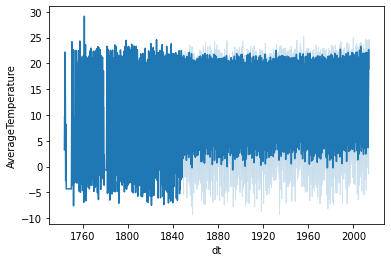

In [24]:
sns.lineplot(x=dataset2.index, y=dataset2['AverageTemperature'])

ADF Statistic: -16.054634
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Data is STATIONARY and has no unit root


<AxesSubplot:xlabel='0'>

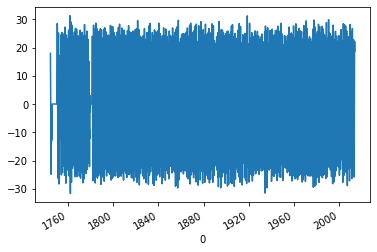

In [25]:
from statsmodels.tsa.stattools import adfuller
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return pd.Series(diff)
train = pd.read_csv('train.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
X = train.values
X = X.astype('float32')
# difference data
day_in_week = 7
stationary = difference(X, day_in_week)
stationary.index = train.index[day_in_week:]
# check if stationary
result = adfuller(stationary)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[1] < 0.05:
    print('Data is STATIONARY and has no unit root')
else:
    print('Data is NON-STATIONARY and has no unit root')
# save
stationary.to_csv('stationary.csv', header=False)
# plot
stationary.plot()

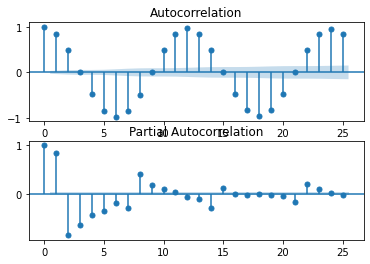

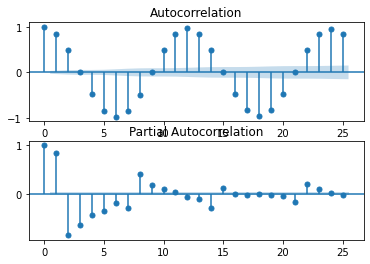

In [26]:
# ACF and PACF plots of time series
from pandas import read_csv
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
stationary = pd.read_csv('stationary.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
plt.figure()
plt.subplot(211)
plot_acf(stationary, lags=25, ax=plt.gca())
plt.subplot(212)
plot_pacf(stationary, lags=25, ax=plt.gca())

In [27]:
value = pd.DataFrame(dataset2[['AverageTemperature']])
temp_df = pd.concat([value, dataset2['AverageTemperature'].rolling(window=5).mean()], axis=1)
temp_df.columns = ['actual_temp', 'predicted_temp']
temp_df.head()

,actual_temp,predicted_temp
dt,,
1743-11-01,3.264,NaN
1743-12-01,9.788,NaN
1744-01-01,9.788,NaN
1744-02-01,9.788,NaN
1744-03-01,9.788,8.4832


In [28]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(temp_df['predicted_temp'][4:], temp_df['actual_temp'][4:]))

In [29]:
rmse

6.854566378574278

In [ ]:
# evaluate manually configured ARIMA model
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from math import sqrt
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return diff
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]
# load data
series = pd.read_csv('train.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # difference data
    shift = 7
    diff = difference(history, shift)
    # predict
    model = ARIMA(diff, order=(3,1,6))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    yhat = inverse_difference(history, shift)
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    #print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
    # report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

C:\Users\Windows10sx\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Windows10sx\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Windows10sx\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Windows10sx\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Windows10sx\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to conver

In [ ]:
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = DataFrame(residuals)
print(residuals.describe())

In [ ]:
# save finalized model
from statsmodels.tsa.arima.model import ARIMA
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return diff
# load data
series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = series.values
X = X.astype('float32')
# difference data
shift = 7
diff = difference(X, shift)
# fit model
model = ARIMA(diff, order=(3,1,6))
model_fit = model.fit()
# bias constant, could be calculated from in-sample mean residual
bias = 165.904728
# save model
model_fit.save('model.pkl')
numpy.save('model_bias.npy', [bias])

In [ ]:
# load and evaluate the finalized model on the validation dataset
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima.model import ARIMAResults
from sklearn.metrics import mean_squared_error
from math import sqrt
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return diff
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]
# load and prepare datasets
dataset = pd.read_csv('train.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
X = dataset.values.astype('float32')
history = [x for x in X]
shift = 7
validation = read_csv('test.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
y = validation.values.astype('float32')
# load model
model_fit = ARIMAResults.load('model.pkl')
bias = numpy.load('model_bias.npy')
# make first prediction
predictions = list()
yhat = float(model_fit.forecast()[0])
yhat = bias + inverse_difference(history, yhat, shift)
predictions.append(yhat)
history.append(y[0])
print('>Predicted=%.3f, Expected=%.3f' % (yhat, y[0]))
# rolling forecasts
for i in range(1, len(y)):
    # difference data
    shift = 7
    diff = difference(history, shift)
    # predict
    model = ARIMA(diff, order=(3,1,6))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    yhat = bias + inverse_difference(history, yhat, shift)
    predictions.append(yhat)
    # observation
    obs = y[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
    # report performance
rmse = sqrt(mean_squared_error(y, predictions))
print('RMSE: %.3f' % rmse)
plt.plot(y)
plt.plot(predictions, color='red')
pyplot.show()